In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../dataset/earthquake_alert_balanced_dataset.csv')
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [3]:
df.shape

(1300, 6)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
magnitude,1300.0,7.061008,0.423738,6.5,6.7,7.0,7.3,8.6
depth,1300.0,50.321538,104.348286,2.0,12.0,19.0,38.0,670.0
cdi,1300.0,6.976154,2.244875,0.0,6.0,8.0,8.0,9.0
mmi,1300.0,6.939231,1.354774,1.0,6.0,7.0,8.0,9.0
sig,1300.0,-9.749231,62.245214,-128.0,-54.0,-7.0,31.0,127.0


In [5]:
df['alert'].value_counts()

alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64

In [6]:
df.isnull().sum()

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

In [20]:
df[df['alert'] == 'green']

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green
...,...,...,...,...,...,...
406,7.0,8.0,0.0,6.0,-14.0,green
407,7.1,10.0,0.0,5.0,8.0,green
408,8.0,24.0,8.0,7.0,-31.0,green
410,6.8,45.0,6.0,7.0,3.0,green


In [18]:
df[df['alert'] == 'yellow']

,magnitude,depth,cdi,mmi,sig,alert
8,6.80,20.0,8.0,7.0,-101.0,yellow
9,7.60,26.0,9.0,8.0,7.0,yellow
10,6.90,10.0,9.0,9.0,119.0,yellow
13,7.60,116.0,8.0,8.0,-59.0,yellow
16,7.00,33.0,9.0,8.0,71.0,yellow
...,...,...,...,...,...,...
1295,6.87,11.0,9.0,7.0,13.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
1298,7.04,51.0,7.0,6.0,-115.0,yellow


In [16]:
df[df['alert'] == 'orange']

,magnitude,depth,cdi,mmi,sig,alert
14,6.60,12.0,9.0,8.0,19.0,orange
35,6.60,13.0,9.0,8.0,-12.0,orange
61,7.30,10.0,9.0,9.0,1.0,orange
73,7.10,43.0,9.0,8.0,76.0,orange
79,7.00,21.0,8.0,7.0,-9.0,orange
...,...,...,...,...,...,...
713,7.10,46.0,8.0,7.0,-2.0,orange
714,6.64,33.0,8.0,8.0,52.0,orange
715,6.88,43.0,8.0,8.0,65.0,orange
716,6.60,12.0,8.0,8.0,-12.0,orange


In [14]:
df[df['alert'] == 'red']

,magnitude,depth,cdi,mmi,sig,alert
25,7.30,41.0,9.0,8.0,93.0,red
44,7.00,20.0,8.0,8.0,-56.0,red
49,7.20,10.0,9.0,8.0,27.0,red
154,7.50,20.0,8.0,8.0,-22.0,red
185,7.30,19.0,8.0,9.0,-26.0,red
...,...,...,...,...,...,...
1026,7.35,18.0,8.0,8.0,-14.0,red
1027,7.16,9.0,9.0,9.0,79.0,red
1028,7.20,9.0,9.0,8.0,74.0,red
1029,7.20,10.0,9.0,8.0,26.0,red


In [23]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = ['alert']

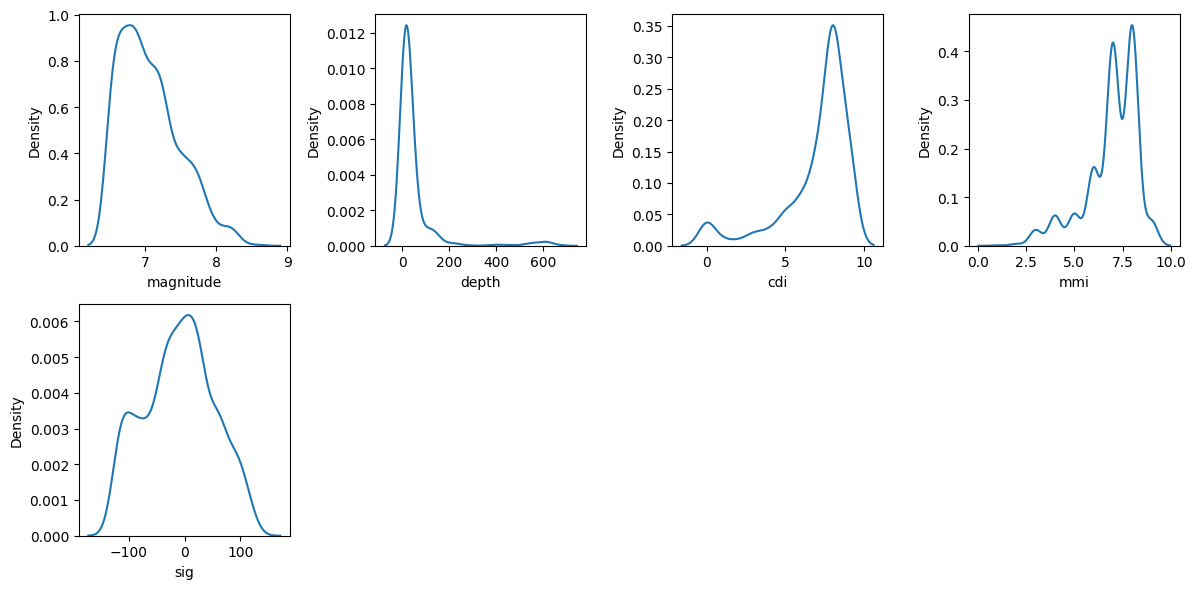

In [25]:
plt.figure(figsize=(12,6))
t = 1
for i in num_cols:
    plt.subplot(2,4,t)
    sns.kdeplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

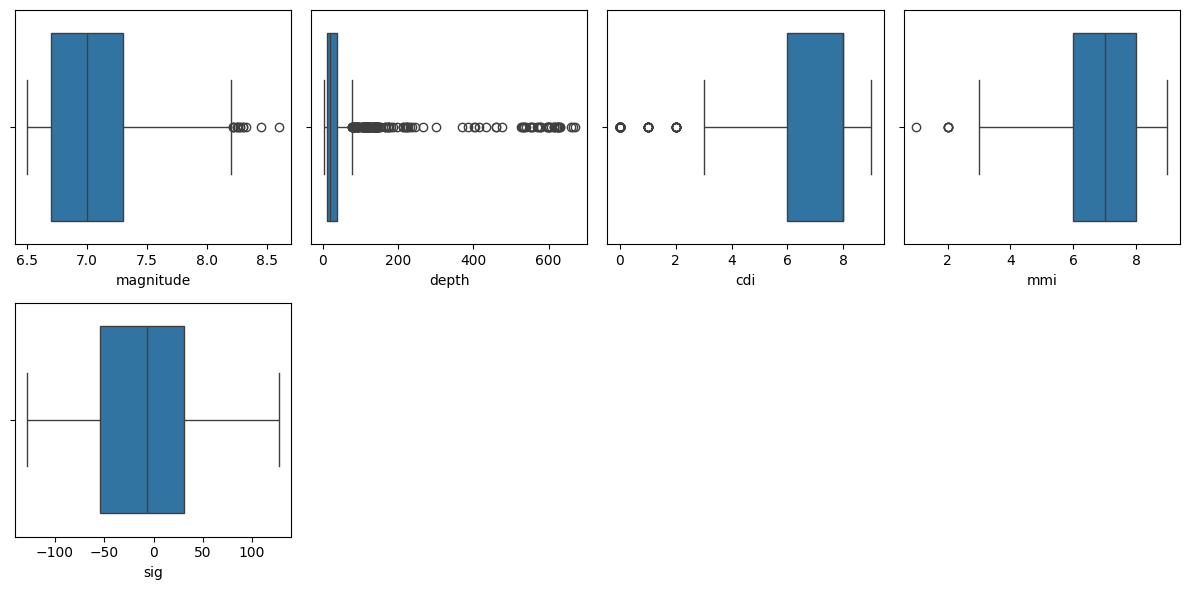

In [27]:
plt.figure(figsize=(12,6))
t = 1
for i in num_cols:
    plt.subplot(2,4,t)
    sns.boxplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

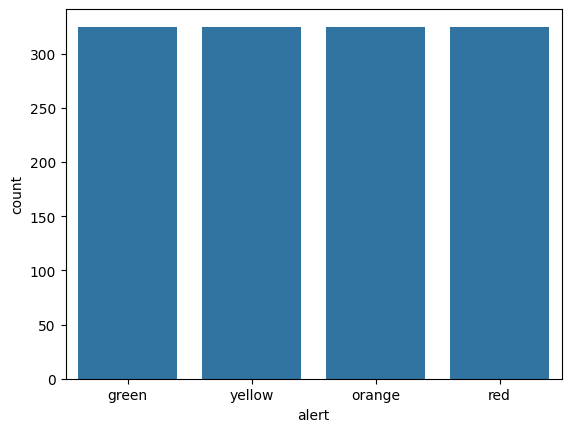

In [29]:
sns.countplot(data=df, x='alert')
plt.show()

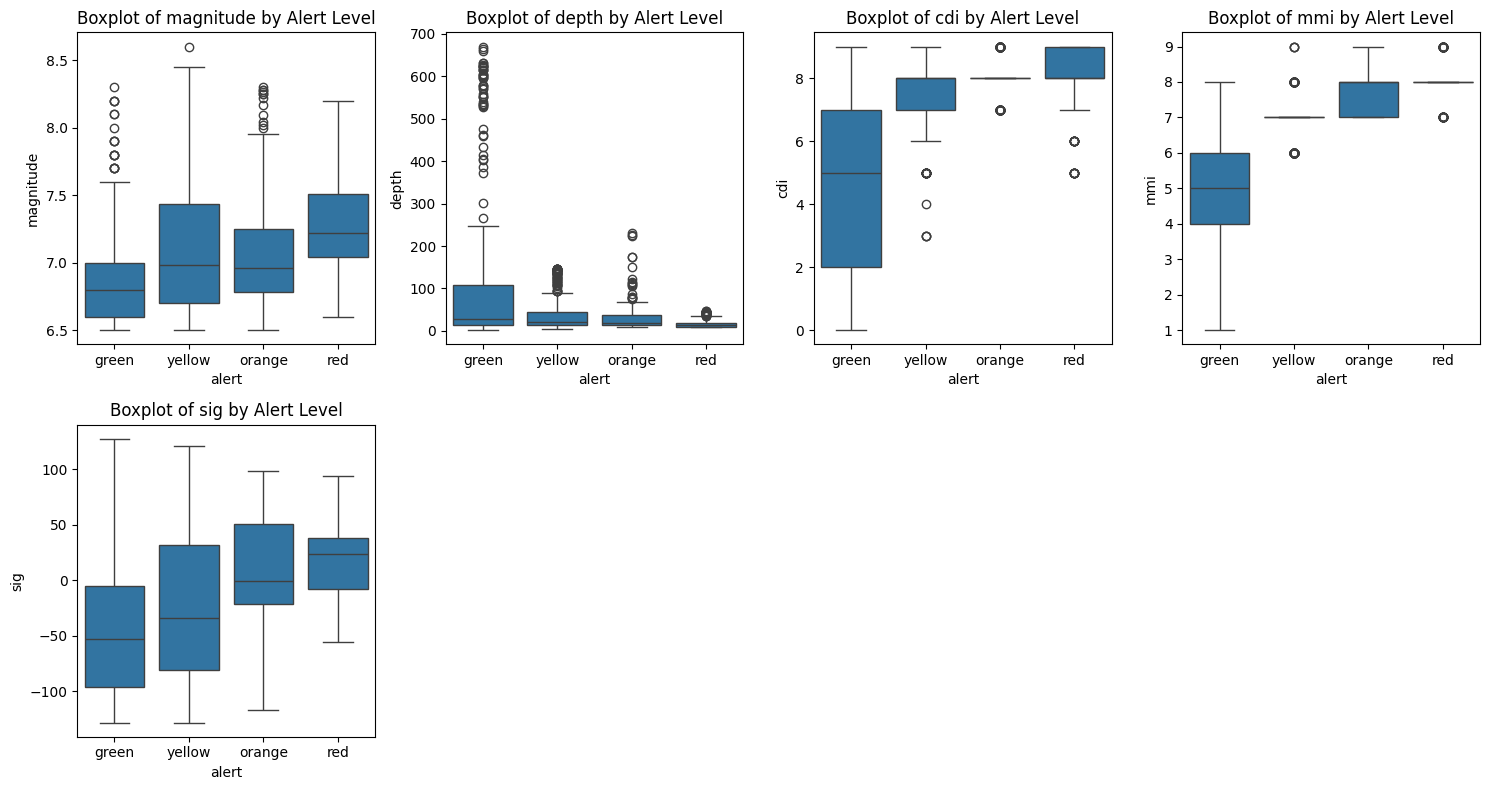

In [36]:
plt.figure(figsize=(15,8))
t = 1
for col in num_cols:
    plt.subplot(2,4,t)
    sns.boxplot(x='alert', y=col, data=df)
    plt.title(f'Boxplot of {col} by Alert Level')
    t+=1
plt.tight_layout()
plt.show()

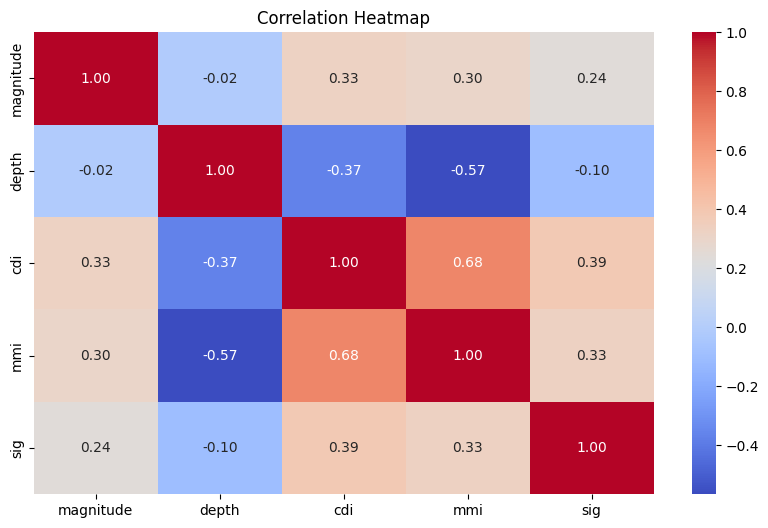

In [38]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [39]:
# Statistical tests can be added here for deeper analysis

# ANOVA

from scipy.stats import f_oneway

#h0: there is no significant difference in means across alert levels
#h1: there is a significant difference in means across alert levels

for col in num_cols:
    groups = [df[df['alert'] == alert][col] for alert in df['alert'].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f'ANOVA results for {col}: F-statistic = {f_stat}, p-value = {p_val}')
    if p_val < 0.05:
        print(f'Reject H0: Significant difference in means for {col} across alert levels')
    else:
        print(f'Fail to Reject H0: No significant difference in means for {col} across alert levels')




ANOVA results for magnitude: F-statistic = 52.30427922363484, p-value = 6.527489773159315e-32
Reject H0: Significant difference in means for magnitude across alert levels
ANOVA results for depth: F-statistic = 66.65820737929756, p-value = 4.3733469149670985e-40
Reject H0: Significant difference in means for depth across alert levels
ANOVA results for cdi: F-statistic = 381.1540497786398, p-value = 1.9761090585695845e-177
Reject H0: Significant difference in means for cdi across alert levels
ANOVA results for mmi: F-statistic = 670.6687792762223, p-value = 4.363127147532485e-263
Reject H0: Significant difference in means for mmi across alert levels
ANOVA results for sig: F-statistic = 73.14493297689913, p-value = 1.0489141975004723e-43
Reject H0: Significant difference in means for sig across alert levels


In [40]:
#ttest for multicollinearity between numerical features

from scipy.stats import ttest_ind
#h0: there is no significant difference between the two features
#h1: there is a significant difference between the two features
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        col1 = num_cols[i]
        col2 = num_cols[j]
        t_stat, p_val = ttest_ind(df[col1], df[col2])
        print(f'T-test results between {col1} and {col2}: T-statistic = {t_stat}, p-value = {p_val}')
        if p_val < 0.05:
            print(f'Reject H0: Significant difference between {col1} and {col2}')
        else:
            print(f'Fail to Reject H0: No significant difference between {col1} and {col2}')

T-test results between magnitude and depth: T-statistic = -14.947708506539797, p-value = 1.5818940552627388e-48
Reject H0: Significant difference between magnitude and depth
T-test results between magnitude and cdi: T-statistic = 1.3392107322388116, p-value = 0.18061922976468134
Fail to Reject H0: No significant difference between magnitude and cdi
T-test results between magnitude and mmi: T-statistic = 3.0931638765648914, p-value = 0.0020014000384063046
Reject H0: Significant difference between magnitude and mmi
T-test results between magnitude and sig: T-statistic = 9.737097546100864, p-value = 4.961331674080104e-22
Reject H0: Significant difference between magnitude and sig
T-test results between depth and cdi: T-statistic = 14.973686669370535, p-value = 1.1043038825259848e-48
Reject H0: Significant difference between depth and cdi
T-test results between depth and mmi: T-statistic = 14.988646174993114, p-value = 8.976408774098104e-49
Reject H0: Significant difference between depth a

In [ ]:
# Splitting the dataset into train and test sets 2 diff file then perform EDA and preprocessing

x = df.drop('alert', axis=1)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['alert'])
train_df.to_csv('../dataset/train_earthquake_alert.csv', index=False)
test_df.to_csv('../dataset/test_earthquake_alert.csv', index=False)

In [42]:
train = pd.read_csv('../dataset/train_earthquake_alert.csv')
test = pd.read_csv('../dataset/test_earthquake_alert.csv')

In [44]:
train.head()

,magnitude,depth,cdi,mmi,sig,alert
0,6.80,42.0,3.0,6.0,-52.0,green
1,6.50,10.0,7.0,5.0,-74.0,green
2,7.80,8.0,8.0,9.0,4.0,red
3,8.17,23.0,9.0,8.0,-88.0,orange
4,7.70,16.0,8.0,7.0,24.0,yellow


In [45]:
test

,magnitude,depth,cdi,mmi,sig,alert
0,8.06,32.0,8.0,7.0,-28.0,yellow
1,7.28,13.0,9.0,8.0,13.0,orange
2,7.30,19.0,8.0,9.0,-26.0,red
3,6.50,20.0,5.0,7.0,-111.0,green
4,7.30,22.0,9.0,7.0,8.0,yellow
...,...,...,...,...,...,...
255,7.63,14.0,8.0,8.0,-11.0,red
256,7.53,19.0,7.0,8.0,-23.0,red
257,7.05,24.0,8.0,8.0,67.0,orange
258,7.92,115.0,9.0,8.0,96.0,orange


In [48]:
rs = RobustScaler()
train[num_cols] = rs.fit_transform(train[num_cols])
test[num_cols] = rs.transform(test[num_cols])

In [50]:
le = LabelEncoder() 
train['alert'] = le.fit_transform(train['alert'])
test['alert'] = le.transform(test['alert'])

In [51]:
X_train = train_df.drop('alert', axis=1)
y_train = train_df['alert']

X_test = test_df.drop('alert', axis=1)
y_test = test_df['alert']

In [53]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [54]:
clfs = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

In [55]:
def train_classifiers(clfs, X_train, y_train, X_test, y_test):
    results = {}
    for name, clf in clfs.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f'Classifier: {name}')
        print(classification_report(y_test, y_pred))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
        kappa = cohen_kappa_score(y_test, y_pred)
        results[name] = {
            'model': clf,
            'roc_auc': roc_auc,
            'kappa': kappa
        }
        print(f'ROC-AUC Score: {roc_auc}')
        print(f'Cohen Kappa Score: {kappa}')
        print('-'*50)
    return results

In [56]:
train_classifiers(clfs, X_train, y_train, X_test, y_test)

Classifier: Logistic Regression
              precision    recall  f1-score   support

       green       0.83      0.75      0.79        65
      orange       0.54      0.52      0.53        65
         red       0.55      0.65      0.60        65
      yellow       0.55      0.52      0.54        65

    accuracy                           0.61       260
   macro avg       0.62      0.61      0.61       260
weighted avg       0.62      0.61      0.61       260

Confusion Matrix:
[[49  1  4 11]
 [ 0 34 20 11]
 [ 0 17 42  6]
 [10 11 10 34]]
ROC-AUC Score: 0.858500986193294
Cohen Kappa Score: 0.482051282051282
--------------------------------------------------
Classifier: Decision Tree
              precision    recall  f1-score   support

       green       0.90      0.83      0.86        65
      orange       0.89      0.85      0.87        65
         red       0.93      0.97      0.95        65
      yellow       0.79      0.85      0.81        65

    accuracy                       

{'Logistic Regression': {'model': LogisticRegression(),
  'roc_auc': 0.858500986193294,
  'kappa': 0.482051282051282},
 'Decision Tree': {'model': DecisionTreeClassifier(),
  'roc_auc': 0.9153846153846155,
  'kappa': 0.8307692307692307},
 'Random Forest': {'model': RandomForestClassifier(),
  'roc_auc': 0.9883925049309665,
  'kappa': 0.8923076923076922}}